# Bank Churn Prediction with Imbalanced data

In [89]:
import pandas as pd
import os

In [90]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\DS_Projects'

In [91]:
data=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\DS_Projects\\train_head.csv')
data

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165028,165028,630,50.0,8,0.00,2,1.0,1.0,5962.50,0,0,0,1
165029,165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1,0
165030,165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,0,1
165031,165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,0,1


In [92]:
data.drop(['Geography_Germany', 'Geography_Spain', 'id'], axis=1, inplace=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...
165028,630,50.0,8,0.00,2,1.0,1.0,5962.50,0,1
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1


# Imbalanced dataset

In [93]:
data['Exited'].value_counts()

0    130113
1     34920
Name: Exited, dtype: int64

In [94]:
X=data.drop(['Exited'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,1
...,...,...,...,...,...,...,...,...,...
165028,630,50.0,8,0.00,2,1.0,1.0,5962.50,1
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,1


In [95]:
y=data['Exited']
y

0         0
1         0
2         0
3         0
4         0
         ..
165028    0
165029    0
165030    0
165031    0
165032    0
Name: Exited, Length: 165033, dtype: int64

# Over sampling

In [96]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=10)
X_os,y_os=os.fit_resample(X,y)

In [97]:
X_os

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,668,33.000000,3,0.000000,2,1.00000,0.000000,181449.970000,1
1,627,33.000000,1,0.000000,2,1.00000,1.000000,49503.500000,1
2,678,40.000000,10,0.000000,2,1.00000,0.000000,184866.690000,1
3,581,34.000000,2,148882.540000,1,1.00000,1.000000,84560.880000,1
4,716,33.000000,5,0.000000,2,1.00000,1.000000,15068.830000,1
...,...,...,...,...,...,...,...,...,...
260221,572,40.992594,1,95236.750666,3,1.00000,0.000000,65665.685949,0
260222,711,50.887022,1,117807.574636,1,0.00807,0.991930,60422.745878,0
260223,656,37.953437,3,130995.259444,1,0.00000,1.000000,144826.909721,0
260224,755,53.858270,0,0.000000,1,1.00000,1.000000,131389.390000,0


In [98]:
y_os.value_counts()

1    130113
0    130113
Name: Exited, dtype: int64

# Scale and split the dataset

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(X_os)
x_scaler

array([[0.636     , 0.2027027 , 0.3       , ..., 0.        , 0.9072786 ,
        1.        ],
       [0.554     , 0.2027027 , 0.1       , ..., 1.        , 0.24748323,
        1.        ],
       [0.656     , 0.2972973 , 1.        , ..., 0.        , 0.92436383,
        1.        ],
       ...,
       [0.612     , 0.26964104, 0.3       , ..., 1.        , 0.7241458 ,
        0.        ],
       [0.81      , 0.48457121, 0.        , ..., 1.        , 0.65695179,
        0.        ],
       [0.792     , 0.51131998, 0.2       , ..., 0.51623215, 0.31358483,
        0.        ]])

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaler,y_os,test_size=0.3,random_state=10)

# Stochastic Gradient Descent

In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SGDClassifier (SVM with hinge loss)
sgd_svm = SGDClassifier(loss='hinge', random_state=42)
sgd_svm.fit(X_train, y_train)

# Make predictions
y_prediction = sgd_svm.predict(X_test)


In [122]:
y_prediction

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [123]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     38910
           1       0.79      0.81      0.80     39158

    accuracy                           0.80     78068
   macro avg       0.80      0.80      0.80     78068
weighted avg       0.80      0.80      0.80     78068



In [125]:
y_new1=sgd_svm.predict(scaler.transform([[625, 40.000000, 3, 117807.000000, 2, 1.00000, 0.000352, 131449.970000, 1]]))
if y_new1==1:
    print("Customer Will Leave")
else:
    print("Wont Leave")

Wont Leave


# KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_predict=knn.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# Creating Confusion matrix and Classification report

In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     38910
           1       0.85      0.84      0.84     39158

    accuracy                           0.84     78068
   macro avg       0.84      0.84      0.84     78068
weighted avg       0.84      0.84      0.84     78068



In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
cn=confusion_matrix(y_test,y_predict)

<AxesSubplot:>

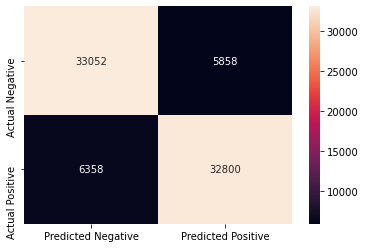

In [108]:
sns.heatmap(cn,annot=True,fmt='d',xticklabels=['Predicted Negative','Predicted Positive'],yticklabels=['Actual Negative','Actual Positive'])

In [109]:
X_os

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,668,33.000000,3,0.000000,2,1.00000,0.000000,181449.970000,1
1,627,33.000000,1,0.000000,2,1.00000,1.000000,49503.500000,1
2,678,40.000000,10,0.000000,2,1.00000,0.000000,184866.690000,1
3,581,34.000000,2,148882.540000,1,1.00000,1.000000,84560.880000,1
4,716,33.000000,5,0.000000,2,1.00000,1.000000,15068.830000,1
...,...,...,...,...,...,...,...,...,...
260221,572,40.992594,1,95236.750666,3,1.00000,0.000000,65665.685949,0
260222,711,50.887022,1,117807.574636,1,0.00807,0.991930,60422.745878,0
260223,656,37.953437,3,130995.259444,1,0.00000,1.000000,144826.909721,0
260224,755,53.858270,0,0.000000,1,1.00000,1.000000,131389.390000,0


# New Prediction

In [110]:
y_new=knn.predict(scaler.transform([[712, 40.000000, 5, 117807.000000, 3, 1.00000, 0.000352, 131449.970000, 1]]))
if y_new==1:
    print("Customer Will Leave")
else:
    print("Wont Leave")

Customer Will Leave


# Undersampling

In [111]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=10)
X_us,y_us=us.fit_resample(X,y)

In [112]:
X_us

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,758,45.0,9,162150.42,1,1.0,0.0,174531.27,1
1,644,38.0,4,143988.00,1,1.0,0.0,117822.71,0
2,600,42.0,7,79563.36,1,1.0,1.0,121568.37,1
3,740,42.0,1,120568.41,2,1.0,1.0,77866.92,0
4,405,29.0,10,0.00,1,1.0,1.0,160810.85,1
...,...,...,...,...,...,...,...,...,...
69835,576,26.0,4,114739.92,1,1.0,1.0,27654.64,0
69836,767,38.0,3,0.00,1,1.0,0.0,152872.84,1
69837,746,60.0,3,108805.42,2,1.0,0.0,78744.37,0
69838,577,45.0,2,0.00,1,0.0,0.0,148811.14,0


In [113]:
y_us.value_counts()

1    34920
0    34920
Name: Exited, dtype: int64

In [114]:
X_scaler=scaler.fit_transform(X_us)
X_scaler

array([[0.816     , 0.36486486, 0.9       , ..., 0.        , 0.87268179,
        1.        ],
       [0.588     , 0.27027027, 0.4       , ..., 0.        , 0.58911191,
        0.        ],
       [0.5       , 0.32432432, 0.7       , ..., 1.        , 0.607842  ,
        1.        ],
       ...,
       [0.792     , 0.56756757, 0.3       , ..., 0.        , 0.39370155,
        0.        ],
       [0.454     , 0.36486486, 0.2       , ..., 0.        , 0.74406886,
        0.        ],
       [0.484     , 0.2027027 , 0.3       , ..., 1.        , 0.8837648 ,
        0.        ]])

In [115]:
X_us_train,X_us_test,y_us_train,y_us_test=train_test_split(X_scaler,y_us,test_size=0.3,random_state=10)

In [116]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_us_train,y_us_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
y_pred=knn1.predict(X_us_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [118]:
print(classification_report(y_us_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     10423
           1       0.75      0.74      0.75     10529

    accuracy                           0.75     20952
   macro avg       0.75      0.75      0.75     20952
weighted avg       0.75      0.75      0.75     20952



In [119]:
cn=confusion_matrix(y_us_test,y_pred)

<AxesSubplot:>

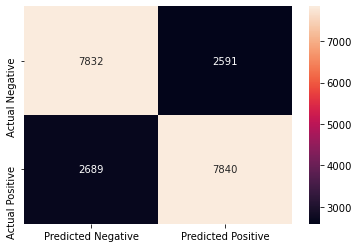

In [120]:
sns.heatmap(cn,annot=True,fmt='d',xticklabels=['Predicted Negative','Predicted Positive'],yticklabels=['Actual Negative','Actual Positive'])